In [3]:
import cv2
import matplotlib.pyplot as plt
import platform
import torch
import utils.utils as utils

In [2]:
# check for gpu otherwise use cpu
if platform.system() == "Darwin":  # checking if it's macOS
    if torch.backends.mps.is_available():
        device = torch.device("mps")
elif torch.cuda.is_available():  # if not macOS, check for CUDA availability
    device = torch.device("cuda")
else:  # if neither macOS nor CUDA, default to CPU
    device = torch.device("cpu")
print(f"Using {device} device for training.")

Using mps device for training.


In [26]:
#### USER INPUTS ####

image_name = "butterfly_starry_night_800.jpg"

n_segments = 2000
compactness = 20
max_dimension = 1500

n_colors = 30

In [29]:
## Image Preprocessing

image_path = f"./data/content_images/{image_name}"
image = cv2.imread(image_path)

height, width, _ = image.shape
print(f"Before: Height - {height}, Width - {width}")

# max_dimension = 2000
max_dimension = 2000
min_dimension = 1000
if height > max_dimension or width > max_dimension:
    scaling_factor = max_dimension / max(height, width)
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    image = cv2.resize(image, (new_width, new_height))
elif height < min_dimension or width < min_dimension:
    scaling_factor = min_dimension / min(height, width)
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    image = cv2.resize(image, (new_width, new_height))

# Convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Resize the image
height, width, _ = image.shape
print(f"After: Height - {height}, Width - {width}")

Before: Height - 800, Width - 448
After: Height - 1785, Width - 1000


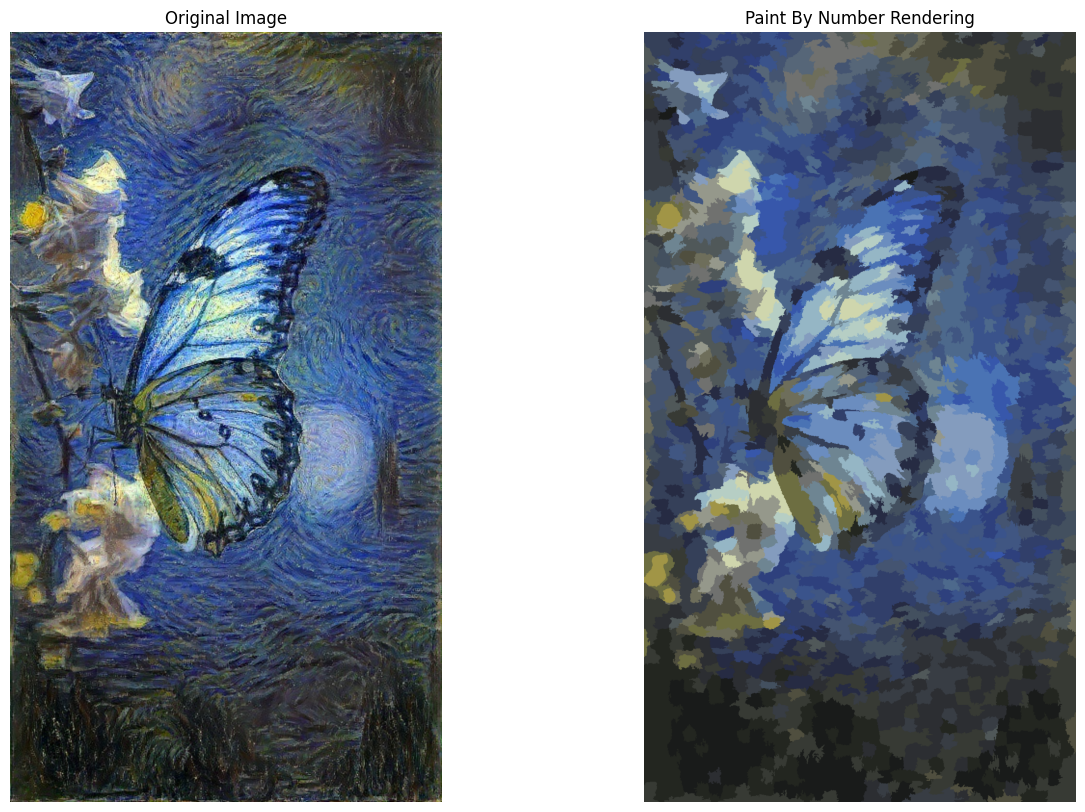

In [27]:
# Quantise image

# Apply SLIC superpixel segmentation
segments = utils.slic_superpixel_segmentation(image, n_segments=n_segments, compactness=compactness)

# Quantize superpixels to a limited color palette
quantized_image, quantized_indices, quantized_colors = utils.quantize_superpixels(image, segments, n_colors=n_colors)

# Display the original and quantized images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Quantized image
plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('Paint By Number Rendering')
plt.axis('off')

plt.show()

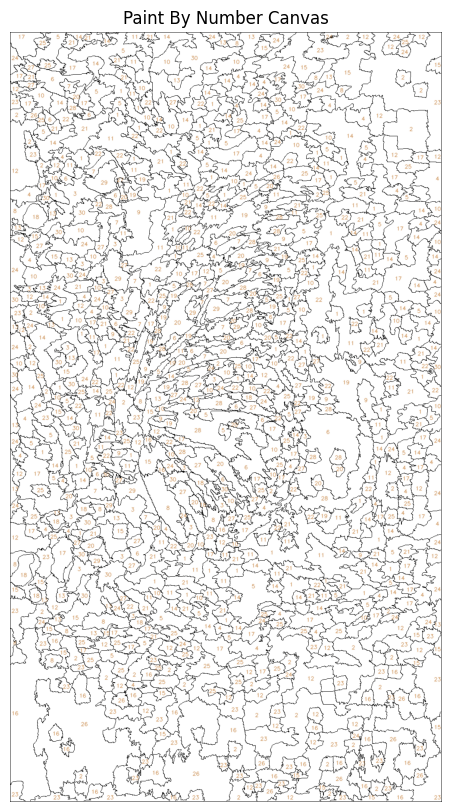

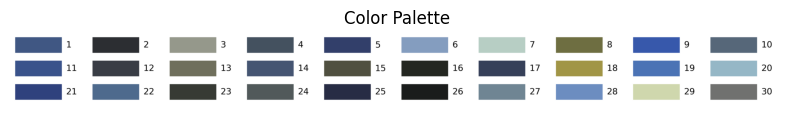

In [28]:
### Create black and white image with numbers and colour palette

# Create edges and labeled image
edges = utils.create_paint_by_number_edges(quantized_indices)
labeled_image_on_white = utils.label_regions_within_edges(quantized_indices, edges)

# Add a black border around 'labeled_image_on_white'
labeled_image_on_white_with_border = utils.add_black_border(labeled_image_on_white, border_size=1)

# Display the color palette
palette_image = utils.display_color_palette(quantized_colors, colors_per_row=10)

# save images
utils.save_images(image_name, image, quantized_image, labeled_image_on_white_with_border, palette_image)


# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(labeled_image_on_white_with_border)
plt.title('Paint By Number Canvas')
plt.axis('off')
plt.show()


# Display the color palette image
plt.figure(figsize=(10, 10))
plt.imshow(palette_image)  # Using the PIL image returned by display_color_palette
plt.title('Color Palette')
plt.axis('off')
plt.show()

